In [52]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
raw = pd.read_csv('charcters_stats.csv')

In [3]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          611 non-null    object
 1   Alignment     608 non-null    object
 2   Intelligence  611 non-null    int64 
 3   Strength      611 non-null    int64 
 4   Speed         611 non-null    int64 
 5   Durability    611 non-null    int64 
 6   Power         611 non-null    int64 
 7   Combat        611 non-null    int64 
 8   Total         611 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 43.1+ KB


In [4]:
raw.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436


In [5]:
raw.groupby('Alignment').describe(include=['O'])

Name                       
          count unique        top freq
Alignment                             
bad         165    165  Rick Flag    1
good        432    431       Nova    2
neutral      11     11   Red Hood    1

In [7]:
from itertools import cycle
c = cycle('AB')

for idx, row in raw.loc[raw['Name'] == 'Nova'].iterrows():
    name = row.Name
    raw.at[idx, 'Name'] = f'{name}_{next(c)}'

raw.loc[raw['Name'].str.contains('Nova')]

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
417,Nova_A,good,100,85,67,101,100,85,538
418,Nova_B,good,38,60,100,100,100,25,423


In [27]:
pd.options.display.max_columns = 56
raw[['Alignment', 'Total']].groupby('Alignment').describe()

Total                                                            
           count        mean         std    min    25%    50%     75%    max
Alignment                                                                   
bad        165.0  247.212121  174.965808    5.0    5.0  271.0  373.00  579.0
good       432.0  214.990741  163.305515    5.0    5.0  244.0  339.75  581.0
neutral     11.0  355.363636  122.137032  196.0  259.0  366.0  412.50  553.0

## Core Mission

- ### 수치의 합이 가장 큰 캐릭터 = Martian Manhunter

In [25]:
raw.sort_values(by='Total', ascending=False).head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
361,Martian Manhunter,good,100,100,96,100,100,85,581
242,General Zod,bad,94,100,96,100,94,95,579
535,Superboy-Prime,bad,94,100,100,100,100,85,579
537,Superman,good,100,100,100,100,94,85,579
16,Amazo,bad,75,100,100,100,100,100,575


- ### 좋은 캐릭터와 나쁜 캐릭터의 수치 분포

In [29]:
good_or_bad = (raw['Alignment'] == 'good') | (raw['Alignment'] == 'bad')
df_good_or_bad = raw[good_or_bad]

In [46]:
df_good_or_bad.corr()

,Intelligence,Strength,Speed,Durability,Power,Combat,Total
Intelligence,1.000000,0.566555,0.619604,0.687092,0.723126,0.784376,0.858042
Strength,0.566555,1.000000,0.635733,0.796222,0.637649,0.579598,0.824354
Speed,0.619604,0.635733,1.000000,0.701740,0.681932,0.597728,0.812106
Durability,0.687092,0.796222,0.701740,1.000000,0.754652,0.681057,0.907394
Power,0.723126,0.637649,0.681932,0.754652,1.000000,0.656019,0.872994
Combat,0.784376,0.579598,0.597728,0.681057,0.656019,1.000000,0.842245
Total,0.858042,0.824354,0.812106,0.907394,0.872994,0.842245,1.000000


__Durability & Total: .907__ > 내구력이 좋아야 다른 능력치를 많이 집어 넣어도 신체가 버틴다

<AxesSubplot:>

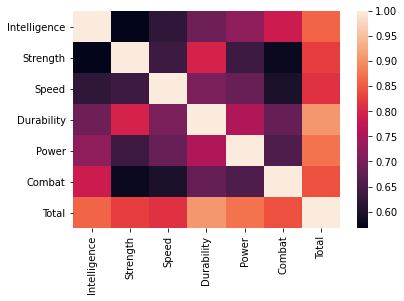

In [47]:
sns.heatmap(data=df_good_or_bad.corr())

__수치의 합 능력치 분포__

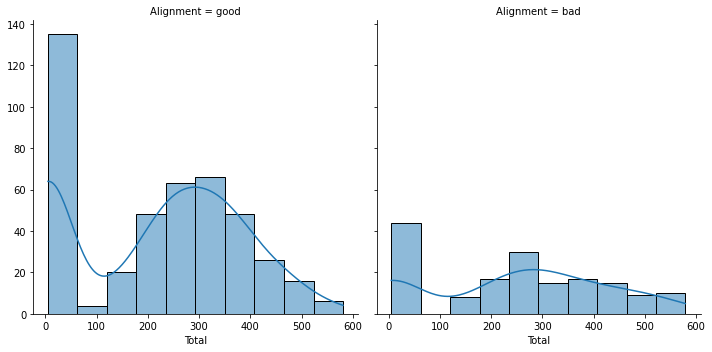

In [79]:
g = sns.FacetGrid(df_good_or_bad, col='Alignment', height=5, margin_titles=True)
g.map(sns.histplot, 'Total', bins=10, kde=True)

In [76]:
mean_df = df_good_or_bad.groupby('Alignment').mean()
mean_df

,Intelligence,Strength,Speed,Durability,Power,Combat,Total
Alignment,,,,,,,
bad,50.018182,34.363636,27.684848,46.284848,44.230303,44.630303,247.212121
good,41.995370,26.638889,26.685185,39.293981,38.291667,42.085648,214.990741


In [130]:
sum_df = df_good_or_bad.groupby('Alignment').sum()
sum_df

,Intelligence,Strength,Speed,Durability,Power,Combat,Total
Alignment,,,,,,,
bad,8253,5670,4568,7637,7298,7364,40790
good,18142,11508,11528,16975,16542,18181,92876


__전체적인 좋은 진영, 나쁜 진영 능력치 비교__

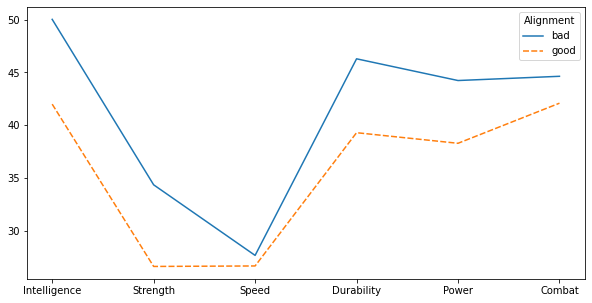

In [148]:
# mean_df = mean_df.drop('Total', axis=1).transpose()
# mean_df = mean_df.transpose()
plt.figure(figsize=(10,5))
sns.lineplot(data=mean_df)
plt.show()

__물리력, 지능 분포__

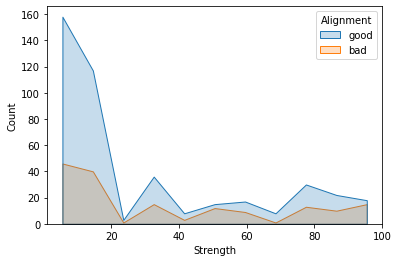

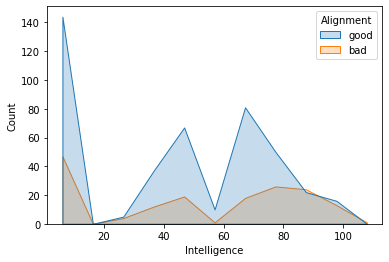

In [150]:
sns.histplot(df_good_or_bad, x="Strength", hue="Alignment", element="poly")
plt.show()
sns.histplot(df_good_or_bad, x="Intelligence", hue="Alignment", element="poly")
plt.show()

__속도, 내구력 분포__

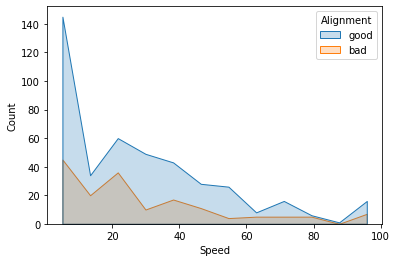

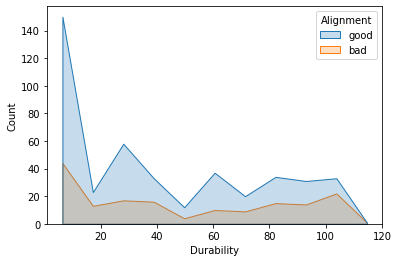

In [153]:
sns.histplot(df_good_or_bad, x="Speed", hue="Alignment", element="poly")
plt.show()
sns.histplot(df_good_or_bad, x="Durability", hue="Alignment", element="poly")
plt.show()

__특수 능력, 전투력 분포__

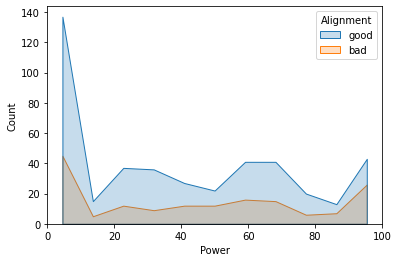

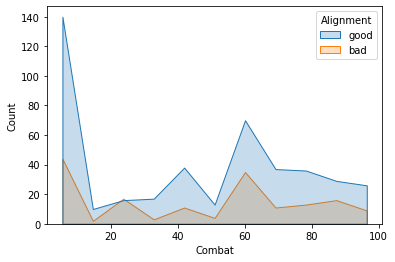

In [154]:
sns.histplot(df_good_or_bad, x="Power", hue="Alignment", element="poly")
plt.show()
sns.histplot(df_good_or_bad, x="Combat", hue="Alignment", element="poly")
plt.show()

__진영별 영웅 종류__

In [ ]:
df_good_or_bad.loc[:, 'Max'] = df_good_or_bad.loc[:, 'Intelligence':'Combat'].apply(max, axis=1)


#  dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
#     dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
#     dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
#     dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
#     dataset.loc[ dataset['Age'] > 64, 'Age']
for col in df_good_or_bad.columns[2:8]:
#     print(col)
    df_good_or_bad.loc[df_good_or_bad[col] == df_good_or_bad['Max'], 'Type'] = col

type_df = df_good_or_bad.groupby(['Alignment', 'Type']).count()
type_df = type_df.rename(columns={"Name": "Count"})
type_df = type_df["Count"]

In [214]:
type_df

Alignment  Type        
bad        Combat           65
           Durability       32
           Intelligence     30
           Power            29
           Speed             3
           Strength          6
good       Combat          226
           Durability       61
           Intelligence     46
           Power            71
           Speed            14
           Strength         14
Name: Count, dtype: int64

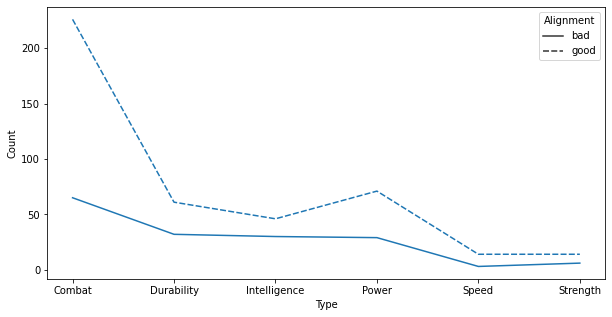

In [204]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Type', y='Count', style='Alignment', data=type_df.reset_index())
plt.show()